In [1]:
#imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from plotnine import *
from plotnine.data import *

In [2]:
#pip install plotnine

In [3]:
# create data frame 
train_df = pd.read_csv('train.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Create a bar chart showing how many missing values are in each column
na_data =train_df.isna().sum()

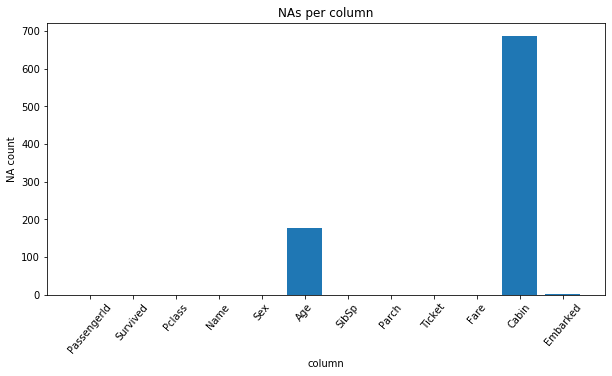

In [6]:
plt.figure(figsize = (10, 5))
plt.bar(x = na_data.index, height = na_data.values)
plt.title('NAs per column');
plt.xticks(rotation = 50);
plt.xlabel('column')
plt.ylabel('NA count');

Most of the nas are in cabin and age.

In [7]:
#Which column has the most `NaN` values? How many cells in that column are empty?
na_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has the most NaN values with 687. 

In [8]:
#Delete all rows where `Embarked` is empty

In [9]:
train_df.dropna(subset = ["Embarked"], inplace = True)

In [10]:
#Fill all empty cabins with **¯\\_(ツ)_/¯**
train_df['Cabin'] = train_df['Cabin'].fillna('shrug') # i can't figure out how to get an actual emoji

In [11]:
# There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
train_df['family'] = train_df['SibSp']+ train_df['Parch']

In [12]:
# Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
# BONUS: Extract the title from everyone's name and create dummy columns

In [13]:
train_df['title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #https://www.kaggle.com/dgolden/titanic-project

In [14]:
title_type = pd.get_dummies(train_df['title'])
train_df = train_df.join(title_type)

In [15]:
train_df.rename(columns ={'Rev':'IsReverend'}, inplace = True )

In [16]:
#Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
embarked_type = pd.get_dummies(train_df['Embarked'])
train_df = train_df.join(embarked_type)

In [17]:
# Do the same thing for `Sex`
sex_type = pd.get_dummies(train_df['Sex'])
train_df = train_df.join(sex_type)

In [18]:
#What was the survival rate overall?
train_df["Survived"].mean() #this will give us the overall survival rate

0.38245219347581555

Overall 38% of the passenger survived. 

In [19]:
#Which gender fared the worst? What was their survival rate?
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Men fared the worst with only a 19% survival rate.

In [20]:
# What was the survival rate for each `Pclass`
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [21]:
# Did any reverends survive? How many?
train_df.groupby('IsReverend')['Survived'].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

No reverends survived 

In [22]:
# What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
cabin_df =train_df[train_df.Cabin == 'shrug'] 
cabin_df.groupby('Cabin')['Survived'].mean()

Cabin
shrug    0.299854
Name: Survived, dtype: float64

In [42]:
#What is the survival rate for people whose `Age` is empty?
train_df['Age_2'] = train_df['Age'].fillna('NA') # the code was not working on actual NAs.
empty_df =train_df[train_df.Age_2 == 'NA']
empty_df['Survived'].mean()

0.2937853107344633

In [24]:
#What is the survival rate for each port of embarkation?
train_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [25]:
#What is the survival rate for children (under 12) in each `Pclass`?
children_df =train_df[train_df.Age <12]

In [26]:
children_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

Did the captain of the ship survive? Is he on the list?
The captain of the ship died. He is not on the list because it only covers passengers. sources http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf 
https://en.wikipedia.org/wiki/Edward_Smith_(sea_captain)

In [27]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
died_df =train_df[train_df.Survived == 0]

In [28]:
died_df.sort_values('Fare', ascending = False).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Mr,Mrs,Ms,IsReverend,Sir,C,Q,S,female,male
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,...,1,0,0,0,0,0,0,1,0,1


The most expensive ticket from someone who died was Charles Fortune who paid 263 dollars.

In [29]:
#Does having family on the boat help or hurt your chances of survival? 
train_df.groupby('family')['Survived'].mean()

family
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Having some family members helps your chance of survival but having more than 4 family members hurts your chance of survival.

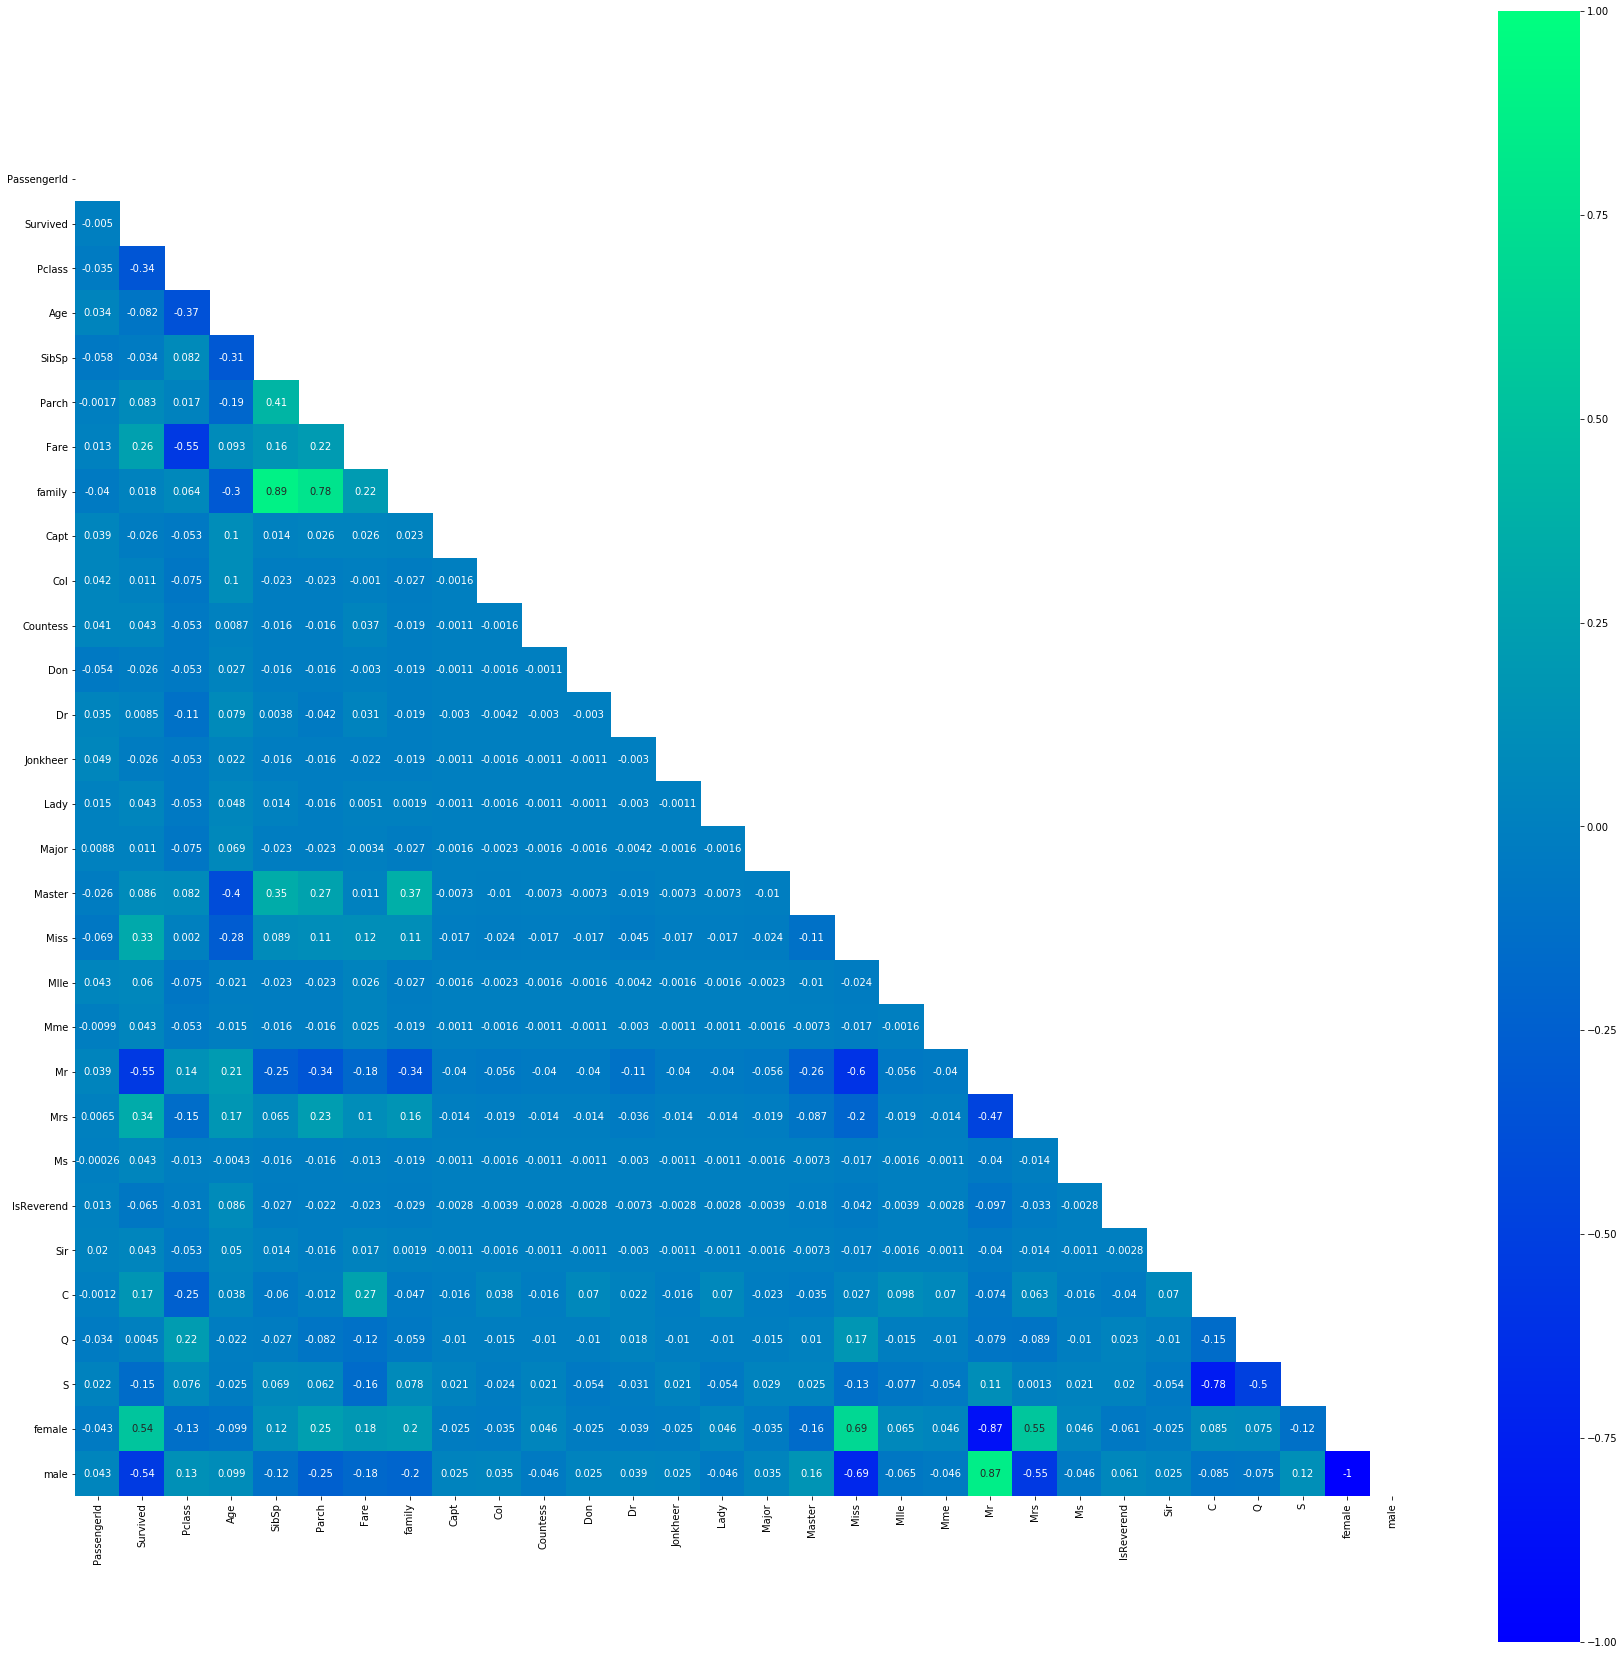

In [30]:
#Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people.
plt.figure(figsize = (30, 30))

# Get correlation of variables.
corr = train_df.corr()
mask = np.zeros_like(corr) # hide the repeat correlations that occur in the table
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, cmap = 'winter', annot = True);

Of the variables female has the highest positive correlation with survival. 

<Figure size 1080x360 with 0 Axes>

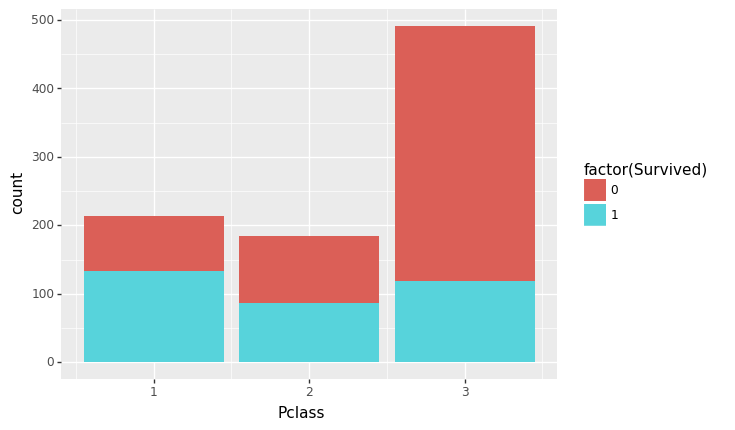

<ggplot: (-9223371931604292956)>

In [31]:
plt.figure(figsize = (15, 5));
ggplot(train_df) + geom_bar(aes(x='Pclass', fill='factor(Survived)'))

The higher the class the more likely to survive. 

C:\Users\dmarm\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


<Figure size 1080x360 with 0 Axes>

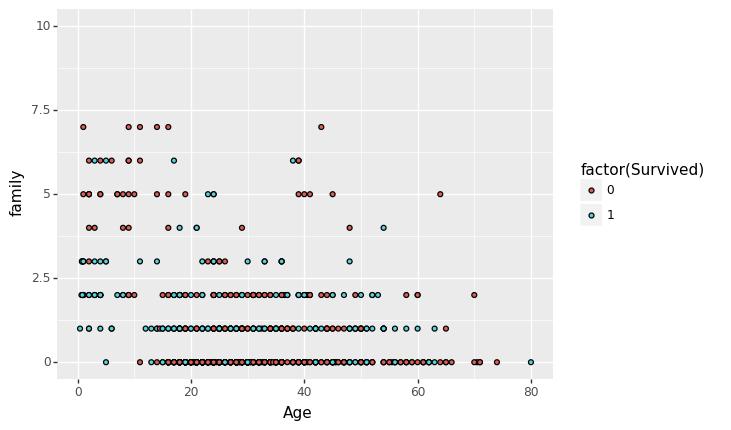

<ggplot: (-9223371931605671644)>

In [32]:
plt.figure(figsize = (15, 5));
ggplot(train_df) + geom_point(aes(x='Age', y="family", fill='factor(Survived)'))

Children were more likely to survive then non chldren. But children tend to have family on board and having family on board also led to more survival. These two variables have multicollearity. 

<Figure size 1080x360 with 0 Axes>

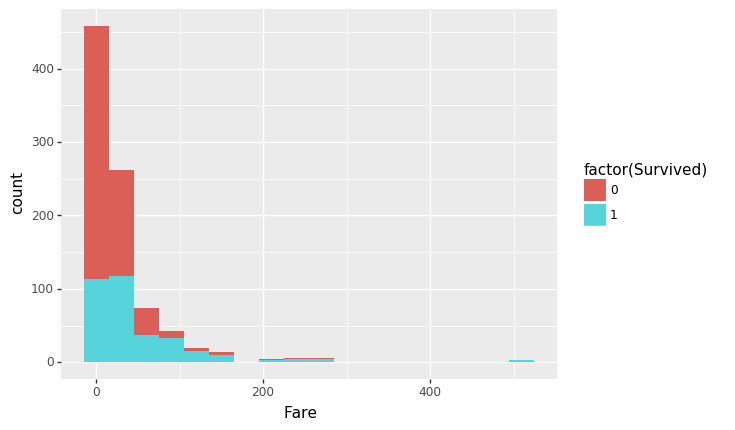

<ggplot: (-9223371931605667000)>

In [37]:
plt.figure(figsize = (15, 5));
ggplot(train_df) + geom_histogram(aes(x='Fare', fill='factor(Survived)'), binwidth =30)

In general passengers who paid a higher fair survived.

<Figure size 1080x360 with 0 Axes>

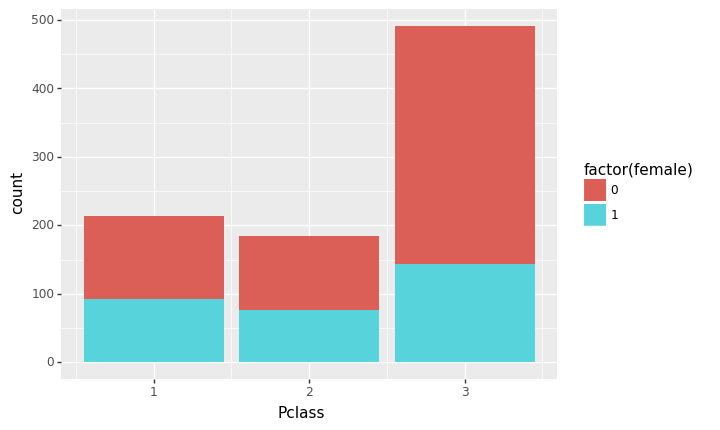

<ggplot: (-9223371931605314532)>

In [40]:
plt.figure(figsize = (15, 5));
ggplot(train_df) + geom_bar(aes(x='Pclass', fill='factor(female)'))

3rd class has a lower percentage of women that first and second class.

From the data it is unclear if women and children were more likely to survive because saving them was prioriized or if they were more likely to survive because they were more prevelant in demographic groups that were more likely to survive

<Figure size 1080x360 with 0 Axes>

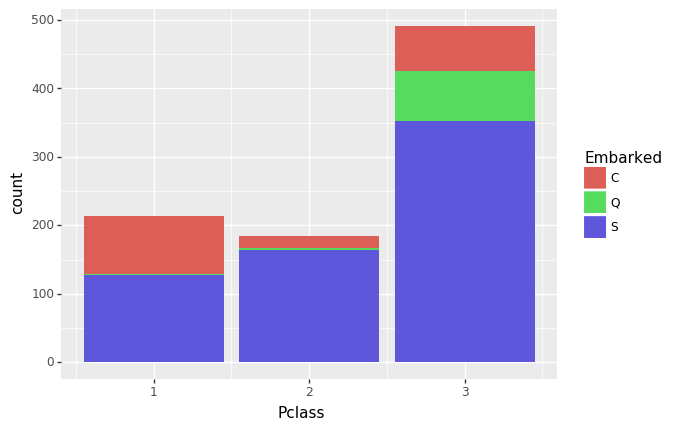

<ggplot: (-9223371931605074412)>

In [41]:
plt.figure(figsize = (15, 5));
ggplot(train_df) + geom_bar(aes(x='Pclass', fill='Embarked'))

The reason location C has the highest survival rate is they have the highest percentage of first class passengers. 